<a href="https://colab.research.google.com/github/abentto/classificacao-imagens-ml-PretaLab/blob/main/ModeloMLAghataBento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://img.freepik.com/fotos-gratis/elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid&w=740

--2025-05-15 22:19:11--  https://img.freepik.com/fotos-gratis/elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid
Resolving img.freepik.com (img.freepik.com)... 23.34.172.56, 23.34.172.35, 2600:1409:3800::1722:ac23, ...
Connecting to img.freepik.com (img.freepik.com)|23.34.172.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32902 (32K) [image/jpeg]
Saving to: ‘elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid’

elegante-e-bonita-j 100%[===================>]  32.13K  --.-KB/s    in 0.1s    

2025-05-15 22:19:12 (228 KB/s) - ‘elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorri

In [ ]:
from transformers import pipeline
from PIL import Image

In [ ]:
pipe = pipeline('image-classification' , model='google/vit-base-patch32-384' , device=0)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [ ]:
imagem = Image.open('elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid')
res = pipe(imagem)
res

[{'label': 'brassiere, bra, bandeau', 'score': 0.5534491539001465},
 {'label': 'maillot', 'score': 0.1633674055337906},
 {'label': 'maillot, tank suit', 'score': 0.0652797594666481},
 {'label': 'miniskirt, mini', 'score': 0.03814360126852989},
 {'label': 'wig', 'score': 0.02533908374607563}]

In [ ]:
detector = pipeline('object-detection' , model='facebook/detr-resnet-50')
classificar = pipeline('image-classification' , model='google/vit-base-patch16-224')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [ ]:
#Analise Imagem
imagem = 'elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid'
detections = detector(imagem)
person_bbox = [d for d in detections if d['label'] == 'person'][0]
person_bbox

{'score': 0.9995567202568054,
 'label': 'person',
 'box': {'xmin': 200, 'ymin': 61, 'xmax': 440, 'ymax': 414}}

In [ ]:
result = classificar('elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid')
print(result)

[{'label': 'brassiere, bra, bandeau', 'score': 0.43120309710502625}, {'label': 'maillot, tank suit', 'score': 0.15170295536518097}, {'label': 'maillot', 'score': 0.10591159015893936}, {'label': 'hoopskirt, crinoline', 'score': 0.05365574732422829}, {'label': 'gown', 'score': 0.04261934384703636}]


In [ ]:
result = classificar('elegante-e-bonita-jovem-afro-americana-em-seus-vinte-anos-posando-isolado-dentro-de-casa-com-um-sorriso-confiante-cruzando-os-bracos-sobre-o-peito-conceito-de-pessoas-estilo-de-vida-e-moda_343059-1812.jpg?semt=ais_hybrid')
print("\n🔍 Resultados da Classificação:")
print("=" * 40)
for item in result:
    print(f"🏷️ {item['label'].upper():<30} | 📊 {item['score']*100:.2f}%")
print("=" * 40)


🔍 Resultados da Classificação:
🏷️ BRASSIERE, BRA, BANDEAU        | 📊 43.12%
🏷️ MAILLOT, TANK SUIT             | 📊 15.17%
🏷️ MAILLOT                        | 📊 10.59%
🏷️ HOOPSKIRT, CRINOLINE           | 📊 5.37%
🏷️ GOWN                           | 📊 4.26%


In [ ]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 745.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch

# Verifica se há uma GPU disponível
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU disponível! Usando:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU não disponível. Usando CPU.")

GPU não disponível. Usando CPU.


In [ ]:
import os
path = '/content/drive/MyDrive/Dataset-img'
print(os.listdir(path))

['mulher-preta', 'mulheres_model.pth', 'mulher-branca']


In [ ]:
#Treinamento dataset imagem
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
#Organizando Imagens
def organize_images(source_dir, target_dir, class_name):
  os.makedirs(os.path.join(target_dir, class_name), exist_ok=True)
  for img_file in os.listdir(source_dir):
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.avif')):
     src = os.path.join(source_dir, img_file)
     dst = os.path.join(target_dir, class_name, img_file)
     shutil.copy(src, dst)

In [ ]:
#Caminhos
source_dir_brancas = '/content/drive/MyDrive/Dataset-img/mulher-branca'
source_dir_pretas = '/content/drive/MyDrive/Dataset-img/mulher-preta'
target_dir = '/content/drive/MyDrive/Dataset-img/dataset'

In [ ]:
#Organizando IMagens 2
organize_images(source_dir_brancas, os.path.join(target_dir, 'treinamento'), 'brancas')
organize_images(source_dir_pretas, os.path.join(target_dir, 'treinamento'), 'pretas')


In [ ]:
#Treinamento
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 15

In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 20 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 4 images belonging to 2 classes.


In [ ]:
# Modelo simples
# Definição da arquitetura do modelo
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    # Segunda camada convolucional
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Configuração do processo de treinamento
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Treinamento
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3375 - loss: 8.5286 - val_accuracy: 0.5000 - val_loss: 2.2155
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6062 - loss: 1.6015 - val_accuracy: 0.5000 - val_loss: 0.6484
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4344 - loss: 0.6936 - val_accuracy: 0.7500 - val_loss: 0.6581
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6750 - loss: 0.6532 - val_accuracy: 0.5000 - val_loss: 0.5889
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6375 - loss: 0.6230 - val_accuracy: 0.5000 - val_loss: 0.6234
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5813 - loss: 0.6148 - val_accuracy: 0.5000 - val_loss: 0.6618
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7708 - loss: 0.6104 - val_accuracy: 0.5000 - val_loss: 0.6262
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8021 - loss: 0.5108 - val_accuracy: 0.7500 - val_loss: 0.6096
Epoch 9/15
3/3 ━

In [ ]:
# Salvar modelo
model.save('modelo_classificacao_racial.h5')

In [ ]:
# Importa a arquitetura MobileNetV2 pré-treinada
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# Carrega o modelo base MobileNetV2 com pesos pré-treinados no ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Usa pesos treinados no ImageNet(Remove a última camada (classificação original e define o formato de entrada das imagens)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Cria um novo modelo sequencial
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
 ])

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [49]:
# Carregar o modelo treinado
model = load_model('modelo_classificacao_racial.h5')

# Função para testar imagem da internet
def test_image_from_url(img_url):
    try:
        response = requests.get(img_url, timeout=10)
        img = Image.open(BytesIO(response.content))

        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Mostrar imagem original
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Imagem Original')
        plt.show()

        # Pré-processar imagem
        img = img.resize((224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Prever
        prediction = model.predict(img_array)
        prob_preta = prediction[0][0]
        prob_branca = 1 - prob_preta

        if prob_branca > prob_preta:
            classe = "Branca"
            confidence = prob_branca
        else:
            classe = "Preta"
            confidence = prob_preta

        print("\nResultado da Classificação:")
        print(f"Classe Predita: {classe}")
        print(f"Confiança: {confidence:.2%}")
        print(f"Probabilidade Branca: {prob_branca:.2%}")
        print(f"Probabilidade Preta: {prob_preta:.2%}")

        return {
            'class': classe,
            'confidence': float(confidence),
            'probabilities': {
                'branca': float(prob_branca),
                'preta': float(prob_preta)
            }
        }

    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")
        return None


In [54]:
# Exemplos de URLs para testar (substitua por URLs reais)
test_urls = [
    'https://img.freepik.com/fotos-gratis/retrato-de-mulher-de-negocios-sorridente-com-espaco-de-copia_23-2148826497.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740',
    'https://img.freepik.com/fotos-gratis/carismatica-alegre-atraente-afro-americana-com-corte-de-cabelo-encaracolado-vestindo-uma-camisa-de-maos-dadas-bolsos-confiante-extrovertido-sorrindo-conversando-uma-conversa-agradavel-sentindo-se-autoconfiante-relaxado_176420-35345.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740',
    'https://img.freepik.com/fotos-gratis/sorrindo-jovem-etnico-femininas-em-t-shirt-ligado-experiencia-colorida_23-2148183334.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740',
]



Testando imagem: https://img.freepik.com/fotos-gratis/retrato-de-mulher-de-negocios-sorridente-com-espaco-de-copia_23-2148826497.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740


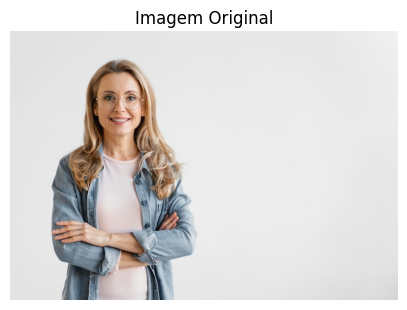

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

Resultado da Classificação:
Classe Predita: Branca
Confiança: 94.30%
Probabilidade Branca: 94.30%
Probabilidade Preta: 5.70%
Resultado: Branca (Confiança: 94.30%)

Testando imagem: https://img.freepik.com/fotos-gratis/carismatica-alegre-atraente-afro-americana-com-corte-de-cabelo-encaracolado-vestindo-uma-camisa-de-maos-dadas-bolsos-confiante-extrovertido-sorrindo-conversando-uma-conversa-agradavel-sentindo-se-autoconfiante-relaxado_176420-35345.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740


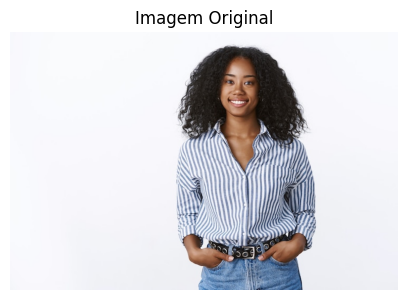

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

Resultado da Classificação:
Classe Predita: Branca
Confiança: 90.01%
Probabilidade Branca: 90.01%
Probabilidade Preta: 9.99%
Resultado: Branca (Confiança: 90.01%)

Testando imagem: https://img.freepik.com/fotos-gratis/sorrindo-jovem-etnico-femininas-em-t-shirt-ligado-experiencia-colorida_23-2148183334.jpg?ga=GA1.1.426392226.1747352215&semt=ais_hybrid&w=740


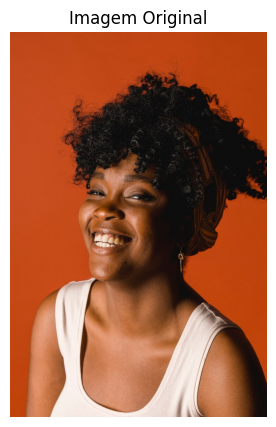

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step

Resultado da Classificação:
Classe Predita: Preta
Confiança: 94.66%
Probabilidade Branca: 5.34%
Probabilidade Preta: 94.66%
Resultado: Preta (Confiança: 94.66%)


In [55]:
# Testar cada URL
for url in test_urls:
    print(f"\nTestando imagem: {url}")
    result = test_image_from_url(url)
    if result:
        print(f"Resultado: {result['class']} (Confiança: {result['confidence']:.2%})")